# SciKit Learn Demo
Following [this](https://scikit-learn.org/stable/tutorial/basic/tutorial.html) tutorial.

In [1]:
from sklearn import datasets, svm
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import pandas as pd

## Supervised Learning with Classifiers
### Example #1: Reading Handwritten Digits
In the example below, we use the standard `digits` dataset included in SciKit-Learn and we train a classifier to recognize digits from small images. This is an example of "supervised learning", because all the images are labeled already. In other words, for every image in the dataset, there is a corresponding numerical label which states what the correct output should be.

A sample of the first 36 images of the 1797-image dataset:


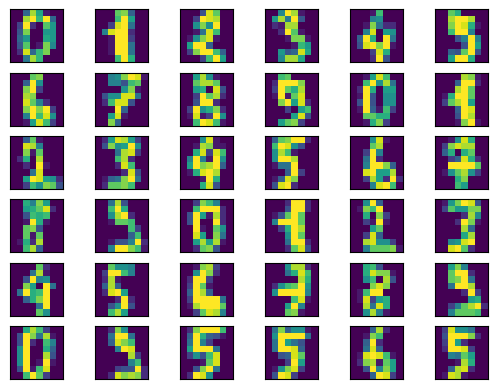

In [2]:
digits = datasets.load_digits()
#print(digits.DESCR)

fig = plt.figure()
dim = 6
print(f'A sample of the first {dim ** 2} images of the {len(digits.images)}-image dataset:')
for i, image in enumerate(digits.images):
    if ( i >= dim ** 2 ):
        break
    ax = fig.add_subplot(dim, dim, i + 1)
    ax.tick_params(
        which='both',
        labelbottom=False,
        labelleft=False,
        bottom=False,
        left=False
    )
    ax.imshow(image)

Training the model...
Image to predict:


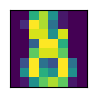

Prediction: [8]


In [3]:
print('Training the model...')
classifier = svm.SVC(gamma=0.001, C=100.0)
classifier.fit(digits.data[:-1], digits.target[:-1])

print('Image to predict:')
fig = plt.figure(figsize=(1, 1))
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(
    which='both',
    labelbottom=False,
    labelleft=False,
    bottom=False,
    left=False
)
ax.imshow(digits.images[-1:][0])
plt.show()

prediction = classifier.predict(digits.data[-1:])
print(f'Prediction: {prediction}')

## Example #2: Identifying Iris Species
This is another supervised learning task. We are training another classifier on the classic iris dataset. These are physical measurements of different iris plants with labels identifying the species of iris.

In [4]:
iris = datasets.load_iris()
#print(iris.DESCR)

classifier = svm.SVC()
print('Training model...')
classifier.fit(iris.data, iris.target_names[iris.target]) # The connection between the names and numbers here is a bit beyond me, but it does work.
classifier.predict(iris.data[:3])

Training model...


array(['setosa', 'setosa', 'setosa'], dtype='<U10')

## Example #3: My Own Handwriting
In this example, I have created a labeled dataset from my own handwriting and trained the model on it.

After some trial and error of trying to get the data from the paper into an image, I found that the following process produced the best results for me.
 - Digitize the paper sheet with a scanner.
 - Open the scan in GIMP and perform the following processing (it's possible this could be automated with GIMP scripting or PIL or something):
     - Crop the image such that the total length and height (in pixels) are even multiples of the number of samples in that dimension, i.e. if I have 30 columns of samples, I crop the image so that its width, in pixels, is an integer multiple of 30.
     - Color to grayscale.
     - Adjust contrast to max, so the resulting pixel values are either `0.0` or `1.0`.
     - Select cell borders with magic select tool, and fill the selection with the background color.
     - Export image to a grayscale format, i.e. "8bpc GRAY".

Digitizing the image with a scanner did a much better job of keeping everything nice and square than trying to take a picture of the page with my phone camera. Then, once I got the processed image into Python, I just had to cut it into chunks and train the model.

Image size: (851, 660)
Rows: 37.0, Cols: 30.0
A sample of the first 100 images of the dataset:


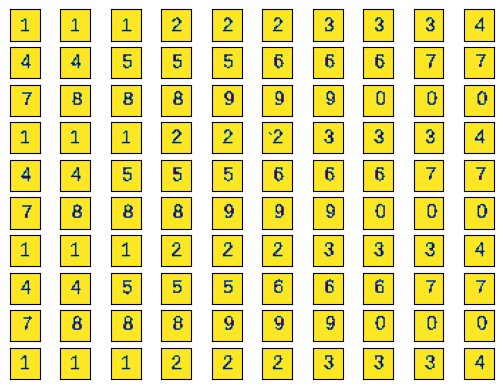

In [5]:
raw_image = pd.DataFrame(imread('.\\Page0001.png'))
print('Image size:', raw_image.shape)

square_h = 23
square_w = 22
print(f'Rows: {raw_image.shape[0] / square_h}, Cols: {raw_image.shape[1] / square_w}')
number_of_squares = (raw_image.shape[0] * raw_image.shape[1]) // (square_w * square_h)
squares = np.ndarray((number_of_squares, square_h, square_w), dtype='float32')
labels = np.ndarray((number_of_squares), dtype='int')

for i_row in range(raw_image.shape[0] // square_h):
    square_top = i_row * square_h
    square_bottom = (i_row + 1) * square_h
    
    for i_col in range(raw_image.shape[1] // square_w):
        square_left = i_col * square_w
        square_right = (i_col + 1) * square_w
        
        square_px = raw_image.iloc[square_top:square_bottom, square_left:square_right]

        #print(f'Col: {i_col} | {square_left}, {square_right}, {square_top}, {square_bottom}')
        
        i_square = i_row * (raw_image.shape[1] // square_w) + i_col
        squares[i_square] = square_px
        labels[i_square] = (i_col // 3 + 1) % 10
     
#print('Squares array:', squares.shape)
#print('Labels array: ', labels.shape)

fig = plt.figure()
dim = 10
print(f'A sample of the first {dim ** 2} images of the dataset:')
for i, square in enumerate(squares):
    if ( i >= dim ** 2 ):
        break
    ax = fig.add_subplot(dim, dim, i + 1)
    ax.tick_params(
        which='both',
        labelbottom=False,
        labelleft=False,
        bottom=False,
        left=False
    )
    ax.imshow(square)

In [6]:
classifier_1 = svm.SVC()
reshaped_squares = squares.reshape(squares.shape[0], squares.shape[1] * squares.shape[2])
end_of_training_data = -30
classifier_1.fit(reshaped_squares[:end_of_training_data], labels[:end_of_training_data])
prediction = classifier_1.predict(reshaped_squares[end_of_training_data:])
print(f'Predictions: {prediction}')
print(f'Labels:      {labels[end_of_training_data:]}')

Predictions: [1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6 7 7 7 8 8 8 9 9 9 0 0 0]
Labels:      [1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6 7 7 7 8 8 8 9 9 9 0 0 0]


In [7]:
print('\n' * 100)